In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [44]:
data = pd.read_csv('thyroid_cancer_risk_data.csv')

# Lets Start With Data Visualization and Analysis

In [45]:
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15 

In [46]:
print(data.head())

   Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
0           1   66    Male   Russia  Caucasian             No   
1           2   29    Male  Germany   Hispanic             No   
2           3   86    Male  Nigeria  Caucasian             No   
3           4   75  Female    India      Asian             No   
4           5   35  Female  Germany    African            Yes   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No       No       1.83   
2                 No                No      No      No       No       6.26   
3                 No                No      No      No       No       4.10   
4                Yes                No      No      No       No       9.10   

   T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk Diagnosis  
0      1.67      6.16         1.08                 Low    Benign  
1     

In [47]:
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
         Patient_ID            Age      TSH_Level       T3_Level  \
count  212691.00000  212691.000000  212691.000000  212691.000000   
mean   106346.00000      51.918497       5.045102       2.001727   
std     61398.74739      21.632815       2.860264       0.866248   
min         1.00000      15.000000       0.100000       0.500000   
25%     53173.50000      33.000000       2.570000       1.250000   
50%    106346.00000      52.000000       5.040000       2.000000   
75%    159518.50000      71.000000       7.520000       2.750000   
max    212691.00000      89.000000      10.000000       3.500000   

            T4_Level    Nodule_Size  
count  212691.000000  212691.000000  
mean        8.246204       2.503403  
std         2.164188       1.444631  
min         4.500000       0.000000  
25%         6.370000       1.250000  
50%         8.240000       2.510000  
75%        10.120000       3.760000  
max        12.000000       5.000000  


In [48]:
# Check missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64


In [49]:
# Convert categorical risk factors into numerical values for correlation analysis
encoding_dict = {
    "Yes": 1, "No": 0,
    "Low": 0, "Medium": 1, "High": 2  # Ordinal encoding for risk levels
}

In [50]:
categorical_features = ["Family_History", "Radiation_Exposure", "Iodine_Deficiency", "Smoking", "Obesity", "Diabetes", "Thyroid_Cancer_Risk"]
data_encoded = data.copy()
for col in categorical_features:
    data_encoded[col] = data_encoded[col].map(encoding_dict)

In [51]:
# Compute correlation matrix
correlation_matrix = data_encoded[categorical_features].corr()

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Risk Factors and Thyroid Cancer Risk")

# Save the figure before showing it
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

# Then show it (if you're in an interactive environment)
plt.show()

In [53]:
# Define hormone levels, risk category and diagnosis category for visualization
hormone_levels = ["TSH_Level", "T3_Level", "T4_Level"]
risk_category = "Thyroid_Cancer_Risk"
diagnosis_category = "Diagnosis"

/tmp/ipykernel_4085132/857467601.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=risk_category, y=hormone, palette="Set2")
/tmp/ipykernel_4085132/857467601.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=risk_category, y=hormone, palette="Set2")
/tmp/ipykernel_4085132/857467601.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=risk_category, y=hormone, palette="Set2")


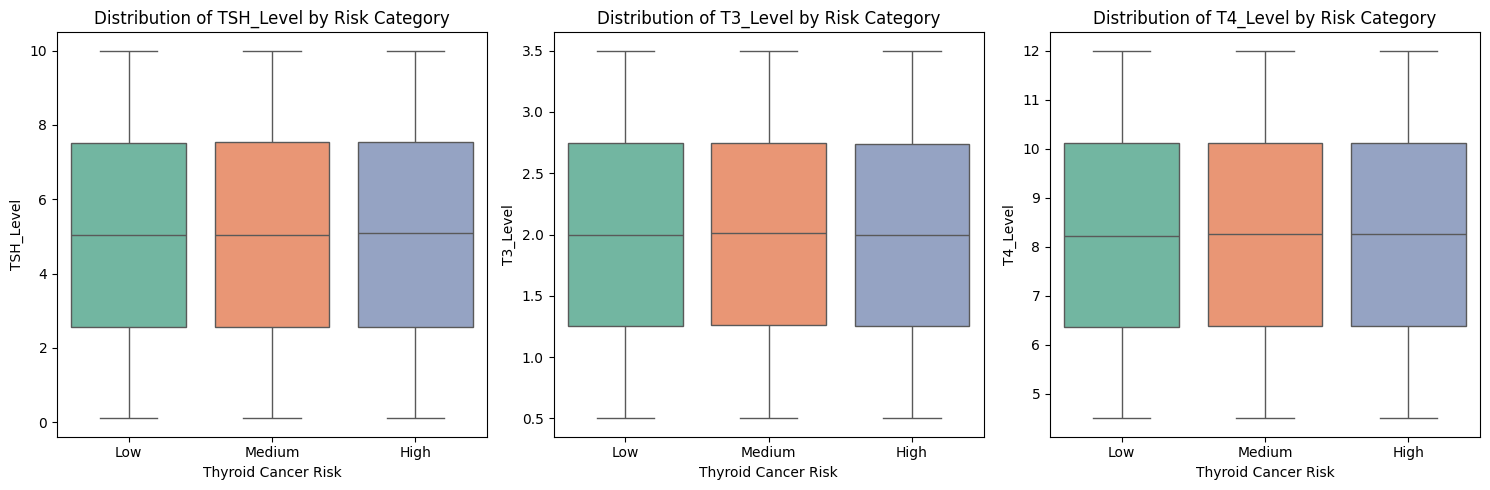

In [54]:
# Plot the distribution of hormone levels across risk categories
plt.figure(figsize=(15, 5))

for i, hormone in enumerate(hormone_levels, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data, x=risk_category, y=hormone, palette="Set2")
    plt.title(f"Distribution of {hormone} by Risk Category")
    plt.xlabel("Thyroid Cancer Risk")
    plt.ylabel(hormone)

plt.tight_layout()
plt.show()

/tmp/ipykernel_4085132/2998310953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=diagnosis_category, y=hormone, palette="coolwarm")
/tmp/ipykernel_4085132/2998310953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=diagnosis_category, y=hormone, palette="coolwarm")
/tmp/ipykernel_4085132/2998310953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=diagnosis_category, y=hormone, palette="coolwarm")


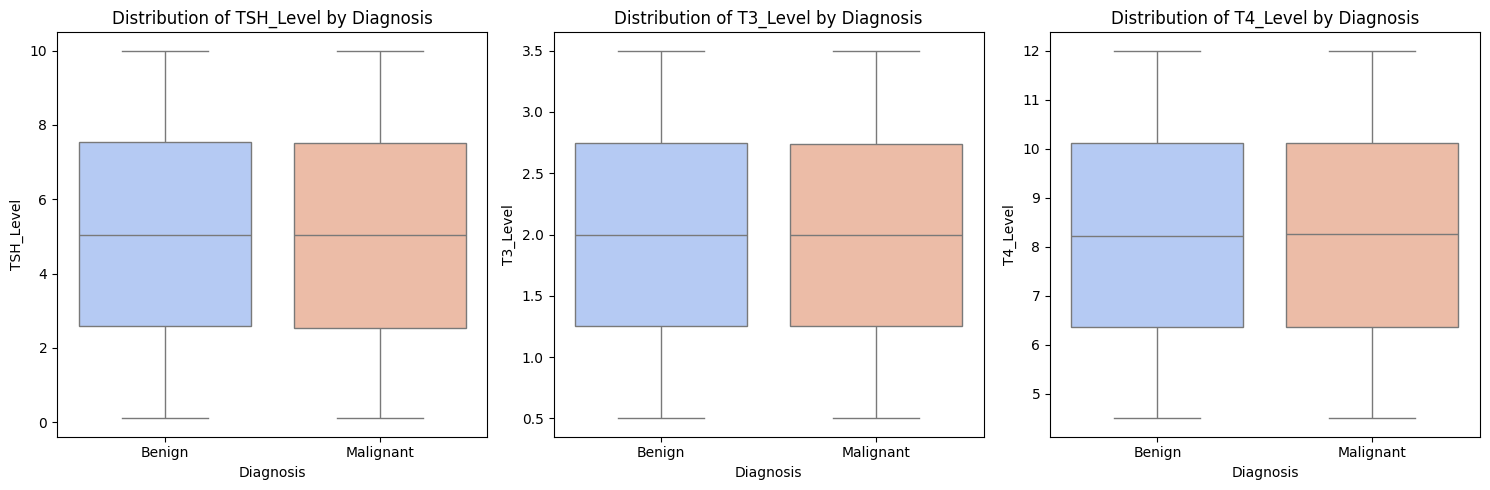

In [55]:
# Plot the distribution of hormone levels across diagnoses
plt.figure(figsize=(15, 5))

for i, hormone in enumerate(hormone_levels, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data, x=diagnosis_category, y=hormone, palette="coolwarm")
    plt.title(f"Distribution of {hormone} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(hormone)

plt.tight_layout()
plt.show()

In [56]:
variables = ["Age", "Nodule_Size"]

/tmp/ipykernel_4085132/1463596882.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=risk_category, y="Age", palette="coolwarm")
/tmp/ipykernel_4085132/1463596882.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=risk_category, y="Nodule_Size", palette="coolwarm")


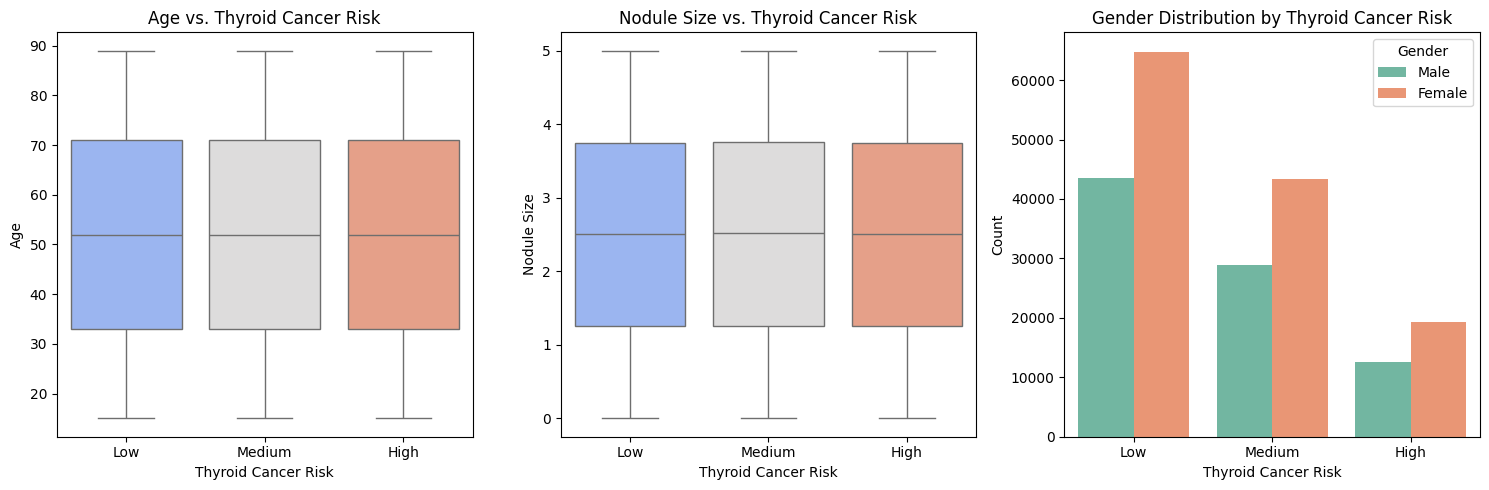

In [57]:
# Set up the figure
plt.figure(figsize=(15, 5))

# Age vs. Cancer Risk
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x=risk_category, y="Age", palette="coolwarm")
plt.title("Age vs. Thyroid Cancer Risk")
plt.xlabel("Thyroid Cancer Risk")
plt.ylabel("Age")

# Nodule Size vs. Cancer Risk
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x=risk_category, y="Nodule_Size", palette="coolwarm")
plt.title("Nodule Size vs. Thyroid Cancer Risk")
plt.xlabel("Thyroid Cancer Risk")
plt.ylabel("Nodule Size")

# Gender Distribution Across Risk Categories
plt.subplot(1, 3, 3)
sns.countplot(data=data, x=risk_category, hue="Gender", palette="Set2")
plt.title("Gender Distribution by Thyroid Cancer Risk")
plt.xlabel("Thyroid Cancer Risk")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [58]:
categorical_columns = ["Gender", "Country", "Ethnicity"]

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Generate pie charts for each category
for i, column in enumerate(categorical_columns):
    data_counts = data[column].value_counts()
    axes[i].pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    axes[i].set_title(f"Distribution of {column}")

plt.tight_layout()

# Save using the figure object
fig.savefig('categorical_distributions.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

# Lets Use Some Machine Learning For Predictive Modeling Based on Specific Demographics!

In [60]:
# Import statements would be at the top (not shown in original code):
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import classification_report, confusion_matrix
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Machine learning model using Random Forest for thyroid cancer prediction
class ThyroidCancerPredictor:
    def __init__(self):
        """
        Initialize the predictor with a Random Forest classifier and preprocessing tools.
        
        The model uses:
        - 100 decision trees in the forest
        - Maximum tree depth of 10 to prevent overfitting
        - Fixed random state for reproducibility
        """
        self.model = RandomForestClassifier(
            n_estimators=100,  # Number of trees in the forest
            max_depth=10,      # Maximum depth of each tree
            random_state=42    # Seed for reproducibility
        )
        self.label_encoders = {}  # Dictionary to store encoders for categorical variables
        self.scaler = StandardScaler()  # Standardizes numerical features to mean=0, variance=1
        
    def preprocess_data(self, df):
        """
        Prepare the data for model training by handling categorical variables and scaling numerical features.
        
        Args:
            df: DataFrame containing patient data with features and diagnosis
            
        Returns:
            X: Processed feature matrix (all numeric)
            y: Target variable (diagnosis)
        """
        # Create copies to avoid modifying original data
        X = df.drop(['Patient_ID', 'Diagnosis'], axis=1)  # Remove ID and target from features
        y = df['Diagnosis']  # Extract target variable
        
        # Define column types for appropriate preprocessing
        numerical_cols = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
        categorical_cols = ['Gender', 'Country', 'Ethnicity', 'Family_History', 
                          'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 
                          'Obesity', 'Diabetes', 'Thyroid_Cancer_Risk']
        
        # Convert categorical variables to numeric using Label Encoding
        # Store encoders for later use in prediction
        for col in categorical_cols:
            self.label_encoders[col] = LabelEncoder()
            X[col] = self.label_encoders[col].fit_transform(X[col])
        
        # Standardize numerical features (mean=0, std=1)
        # This helps features with different scales contribute equally
        X[numerical_cols] = self.scaler.fit_transform(X[numerical_cols])
        
        return X, y
    
    def train(self, X, y):
        """
        Train the model using the preprocessed data and evaluate its performance.
        
        Args:
            X: Processed feature matrix
            y: Target variable
            
        Returns:
            Dictionary containing various performance metrics and evaluation results
        """
        # Split the data into training (80%) and testing (20%) sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        # Train the Random Forest model on the training data
        self.model.fit(X_train, y_train)
        
        # Evaluate model performance on different datasets
        train_score = self.model.score(X_train, y_train)  # Accuracy on training data
        test_score = self.model.score(X_test, y_test)     # Accuracy on test data
        cv_scores = cross_val_score(self.model, X, y, cv=5)  # 5-fold cross-validation scores
        
        # Generate predictions for test set to calculate detailed metrics
        y_pred = self.model.predict(X_test)
        
        # Calculate and rank feature importance from the Random Forest
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': self.model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        # Return comprehensive evaluation results
        return {
            'train_score': train_score,  # Model accuracy on training data
            'test_score': test_score,    # Model accuracy on test data 
            'cv_scores': cv_scores,      # Cross-validation scores
            'classification_report': classification_report(y_test, y_pred),  # Detailed metrics
            'confusion_matrix': confusion_matrix(y_test, y_pred),  # Error matrix
            'feature_importance': feature_importance,  # Ranked feature importance
            'X_test': X_test,  # Test features (for ROC curve)
            'y_test': y_test,  # Test labels
            'y_pred': y_pred   # Model predictions
        }
    
    def predict(self, new_data):
        """
        Make predictions on new patient data.
        
        Args:
            new_data: DataFrame with same features as training data (excluding Diagnosis)
            
        Returns:
            predictions: Class predictions (Benign/Malignant)
            probabilities: Probability scores for each class
        """
        # Preprocess new data using the same transformations as training data
        processed_data = new_data.copy()
        
        # Transform categorical variables using stored encoders
        for col, encoder in self.label_encoders.items():
            if col in processed_data.columns:
                processed_data[col] = encoder.transform(processed_data[col])
        
        # Scale numerical features using the stored scaler
        numerical_cols = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
        processed_data[numerical_cols] = self.scaler.transform(processed_data[numerical_cols])
        
        # Generate predictions and probability scores
        predictions = self.model.predict(processed_data)  # Class labels
        probabilities = self.model.predict_proba(processed_data)  # Class probabilities
        
        return predictions, probabilities

    def plot_results(self, results):
        """
        Visualize model evaluation results using multiple plots.
        
        Args:
            results: Dictionary returned by the train method
            
        Returns:
            fig: Matplotlib figure with 4 subplots showing different aspects of model performance
        """
        # Create a figure with 2x2 subplots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Confusion Matrix - Shows true/false positives/negatives
        sns.heatmap(results['confusion_matrix'], annot=True, fmt='d', ax=ax1)
        ax1.set_title('Confusion Matrix')
        ax1.set_xlabel('Predicted')
        ax1.set_ylabel('Actual')
        
        # 2. Feature Importance - Shows top 10 most influential features
        top_features = results['feature_importance'].head(10)
        sns.barplot(x='importance', y='feature', data=top_features, ax=ax2)
        ax2.set_title('Top 10 Feature Importance')
        
        # 3. Cross-validation Scores - Shows distribution of CV scores
        sns.boxplot(x=results['cv_scores'], ax=ax3)
        ax3.set_title('Cross-validation Scores Distribution')
        
        # 4. ROC Curve - Shows tradeoff between sensitivity and specificity
        from sklearn.metrics import roc_curve, auc
        
        # Convert labels to numeric (assuming 'Malignant' is the positive class)
        y_test_numeric = (results['y_test'] == 'Malignant').astype(int)
        
        # Calculate ROC curve points
        fpr, tpr, _ = roc_curve(y_test_numeric, 
                               self.model.predict_proba(results['X_test'])[:, 1],
                               pos_label=1)
        roc_auc = auc(fpr, tpr)  # Calculate Area Under Curve
        
        # Plot ROC curve
        ax4.plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROC curve (AUC = {roc_auc:.2f})')
        ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal reference line
        ax4.set_xlim([0.0, 1.0])
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('False Positive Rate')
        ax4.set_ylabel('True Positive Rate')
        ax4.set_title('Receiver Operating Characteristic')
        ax4.legend(loc="lower right")
        
        plt.tight_layout()  # Adjust spacing between subplots
        return fig  # Return figure for display or saving

In [ ]:
# Load your data
df = pd.read_csv('thyroid_cancer_risk_data.csv')

# Clear any existing plots
plt.close('all')

# Initialize and train the model
predictor = ThyroidCancerPredictor()
X, y = predictor.preprocess_data(df)
results = predictor.train(X, y)

# Print results
print(f"Training Score: {results['train_score']:.3f}")
print(f"Testing Score: {results['test_score']:.3f}")
print(f"\nCross-validation Scores: {results['cv_scores'].mean():.3f} (+/- {results['cv_scores'].std() * 2:.3f})")
print("\nClassification Report:")
print(results['classification_report'])

# Plot results once and show
fig = predictor.plot_results(results)
plt.show()

In [62]:
#Making predictions !!
# Example of making predictions for a new patient feel free to adjust in another cell to test it out
new_patient_data = pd.DataFrame({
    'Age': [40],
    'Gender': ['Female'],
    'Country': ['USA'],
    'Ethnicity': ['Caucasian'],
    'Family_History': ['No'],
    'Radiation_Exposure': ['No'],
    'Iodine_Deficiency': ['No'],
    'Smoking': ['No'],
    'Obesity': ['No'],
    'Diabetes': ['No'],
    'TSH_Level': [2.5],
    'T3_Level': [120],
    'T4_Level': [8.5],
    'Nodule_Size': [1.2],
    'Thyroid_Cancer_Risk': ['Low']
})

predictions, probabilities = predictor.predict(new_patient_data)
print(f"Prediction: {predictions[0]}")
print(f"Probability of Malignant: {probabilities[0][1]:.3f}")
#It predicts chances of cancer in percentage out of 1 (ie: .86 -> 86%) !

Prediction: Benign
Probability of Malignant: 0.145


# More Prediction with Logistic Regression and Random Forest To Check our Accuracy

In [63]:
columns_to_drop = ['Patient_ID', 'Country', 'Ethnicity']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [64]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Thyroid_Cancer_Risk', 'Diagnosis']

In [65]:
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [66]:
# Define features and target
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

In [67]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
# Define models to train
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),

}

In [70]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Training Logistic Regression...
Logistic Regression Accuracy: 0.8251
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539

--------------------------------------------------
Training Random Forest...
Random Forest Accuracy: 0.8233
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.44      0.53      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.71     42539
weighted avg       0.81      0.82      0.81     42539

--------------------------------------------------
